In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import random
import time
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

import pandas as pd # esto para poner tablas numericas

sns.set()   

$$ |\psi_0(x)|^2 = \frac{1}{Z}\lim_{\tau\to\infty}\int e^{-\varepsilon\mathcal{E}}dx_1\cdots dx_{N-1} $$
$$ Z = \lim_{\tau\to\infty}\int e^{-\varepsilon\mathcal{E}}dx dx_1\cdots dx_{N-1} $$

con $$\mathcal{P} = e^{-\varepsilon\mathcal{E}} = e^{-\mathcal{E} / k_B T}, \quad \Longrightarrow \quad k_B T = \frac{1}{\varepsilon} \equiv \frac{\hbar}{\varepsilon} $$

In [94]:
N = 200 ; eps = 0.1
M = 201 ; delta = 1.8*2/(M-1)

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)


In [122]:
def V(x): return x**2 / 2

def mean_energy(x, m, eps):
    """
    x:      Path de largo N+1
    ----
    return:
    E:      Energia promedio aproximada del camino 
    """

    T = 0 ; U = 0
    for j in range(1, len(x)):
        T += ((x[j] - x[j-1]) / eps)**2
        U += V((x[j] + x[j-1]) / 2)

    return m*T / 2 + U

path = np.zeros(N+1)              # camino inicial (cercano a la solucion)
distribution = np.zeros(M)


oldE = 0 ; newE = 0 ; change = 0 ; trials = 25000

#for k in range(200):

# path = np.random.random_integers(-(M-1)/2, (M-1)/2 + 1, N)*1.8 / (M-1)  # camino inicial (cercano a la solucion)
path = np.zeros(N+1)

for i in range(trials):

    element = np.random.randint(0, N+1)
    U = np.random.uniform()

    x_element = path[element].copy()

    change = np.random.randint(0, M)

    path[element] = space_grid[change]
    newE = mean_energy(path, 1,  eps)

    if newE >  oldE and np.exp(-eps*(newE - oldE)) < U:     # rechazamos
        path[element] = x_element

    element = np.where(space_grid == path[element])[0]
    if element < M and element >= 0: distribution[element] += 1

    oldE = newE



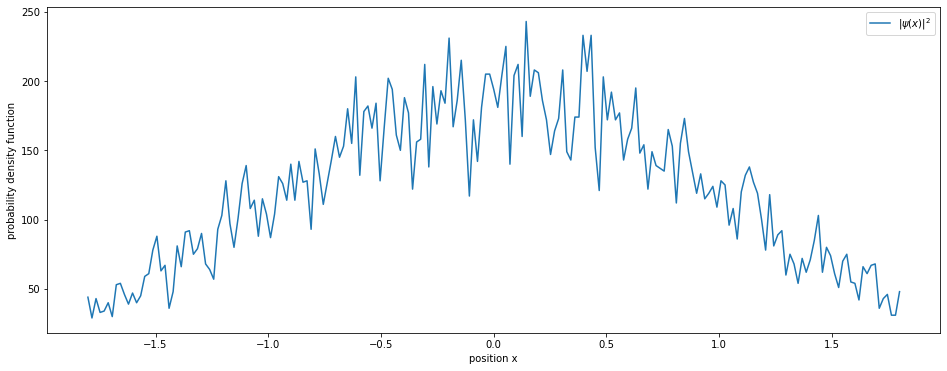

In [123]:
plt.figure(figsize=(16,6))

plt.plot(space_grid, distribution, label='$|\\psi(x)|^2$')
plt.xlabel('position x')
plt.ylabel('probability density function')
plt.legend()
plt.show()

In [34]:
(np.linspace(-1.8, 1.8, M)/(2*1.8)+.5)*(M-1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

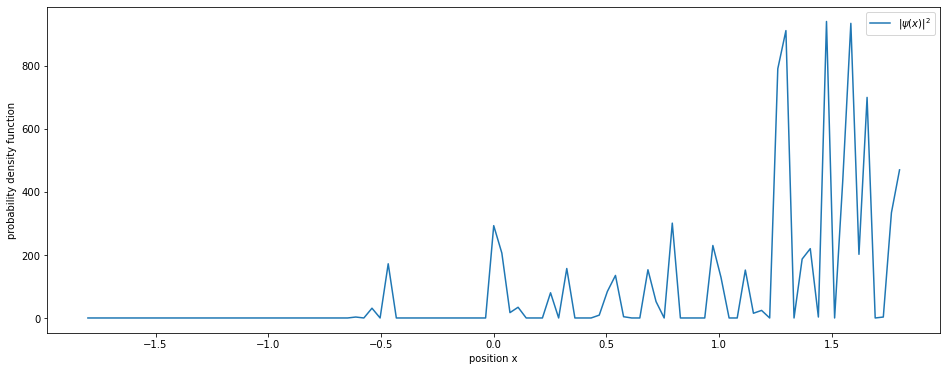

In [93]:
N = 100 ; M = 101 ; trials = 2500 ; xscale = 10

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)

path = np.zeros(N+1)              # camino inicial (cercano a la solucion)
distribution = np.zeros(M)

def mean_energy(x, m):
    """
    x:      Path de largo N+1
    ----
    return:
    E:      Energia promedio aproximada del camino 
    """

    T = 0 ; U = 0
    for j in range(1, len(x)):
        T += (x[j] - x[j-1])**2
        #U += V((x[j] + x[j-1]) / 2)

    return m*T


oldE = 0 ; newE = 0 ; change = 0 ; trials = 25000

#for k in range(200):

path = np.zeros(N+1)  

for i in range(trials):

    element = np.random.randint(0, N)
    U = np.random.uniform()
    change = 1.8*(0.5 - U)
    #change = np.random.randint(0, M)
    path[element] += change #space_grid[change]
    newE = mean_energy(path, 1)

    if newE >  oldE and np.exp(-(newE - oldE)) < U:     # rechazamos
        path[element] -= change

    #for j in range(M):
    #    if np.abs(path[element] - space_grid[j]) <= 0.5:
    #        element_index = j

    #        distribution[j] += 1

    #for j in range(N):
    element = int((path[j]/(2*1.8) + .5)*(M-1))     # se puede hacer un test con np.linspace(-1.8, 1.8, M)/(2*1.8)+.5)*(M-1)
    if element < M and element >= 0: distribution[element] += 1
    
    oldE = newE


plt.figure(figsize=(16,6))

plt.plot(space_grid, distribution, label='$|\\psi(x)|^2$')
plt.xlabel('position x')
plt.ylabel('probability density function')
plt.legend()
plt.show()


0.0

In [64]:
N = 100 ; eps = 0.1 ; delta = 1.8 ; hbar = 1

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)

In [65]:
def V(x): return x**2 / 2

def E(x, y, eps, V, m=1):
    T = 0.5*m*((x - y)/eps)**2

    U = V((x + y)/2)

    return T + U

In [70]:
# vector saving x values for the histogram
X = []

# initial path
path = np.zeros(N+1)

# choosing a random x_j and changing it to x_j'
element = np.random.randint(0, N+1)

U = np.random.uniform()

new_path_element = path[element] + delta*(U - 0.5)

# Getting the difference in energy between the modified and unmodified paths

newE = E(path[element-1], new_path_element, eps, V) + E(new_path_element, path[element+1], eps, V)

oldE = E(path[element-1], path[element], eps, V) + E(path[element], path[element+1], eps, V)

deltaE = newE - oldE

if deltaE < 0 or U < np.exp(-eps*deltaE / hbar):

    path[element] = new_path_element

X.append(path[element])








In [232]:
N = 200 ; eps = 0.05
M = 101 ; delta = 1.8*2/(M-1)

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)

def V(x): return x**2 / 2

def E(x, y, eps, V, m=1):
    T = 0.5*m*((x - y)/eps)**2

    U = V((x + y)/2)

    return T + U



path = np.zeros(N+1)              # camino inicial (cercano a la solucion)
distribution = np.zeros(M)


oldE = 0 ; newE = 0 ; change = 0 ; trials = 2500

#for k in range(200):

path = np.zeros(N+1)
path[-1] = path[0]

for i in range(trials):

    element = np.random.randint(1, N)
    U = np.random.uniform()
    W = np.random.uniform()

    x_element = path[element].copy()

    change = 1.8*(0.5 - W)

    path[element] += change
    newE = E(path[element-1], path[element], eps, V) + E(path[element], path[element+1], eps, V)

    if newE >  oldE and np.exp(-eps*(newE - oldE)) < U:     # rechazamos
        path[element] = x_element
    else: oldE = newE

    index = int((M-1)*(path[element] + 1.8)/(2*1.8))  #np.where(space_grid == path[element])[0]
    if index < M and index > 0: distribution[index] += 1

    

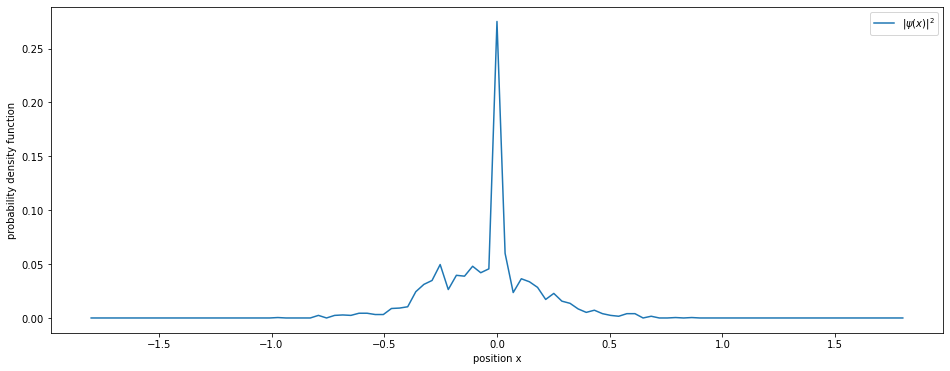

In [233]:
plt.figure(figsize=(16,6))

plt.plot(space_grid, distribution/np.sum(distribution), label='$|\\psi(x)|^2$')
plt.xlabel('position x')
plt.ylabel('probability density function')
plt.legend()
plt.show()

## Mejor algoritmo final

In [304]:
N = 200 ; eps = 0.1
M = 201 ; delta = 1.8*2/(M-1)

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)

def V(x): return x**2 / 2

def E(x, y, eps, V, m=1):
    T = 0.5*m*((x - y)/eps)**2

    U = V((x + y)/2)

    return T + U



path = np.zeros(N+1)              # camino inicial (cercano a la solucion)
distribution = np.zeros(M)


oldE = 0 ; newE = 0 ; change = 0 ; trials = 1000000

#for k in range(200):

path = np.zeros(N+1)
path[-1] = path[0]

for i in range(trials):

    element = np.random.randint(1, N)
    U = np.random.uniform()

    x_element = path[element].copy()

    change = np.random.randint(0, M)

    path[element] = space_grid[change]
    newE = E(path[element-1], path[element], eps, V) + E(path[element], path[element+1], eps, V)

    if newE >  oldE and np.exp(-eps*(newE - oldE)) < U:     # rechazamos
        path[element] = x_element
    else: oldE = newE

    element = np.where(space_grid == path[element])[0]
    if element < M and element >= 0: distribution[element] += 1

    

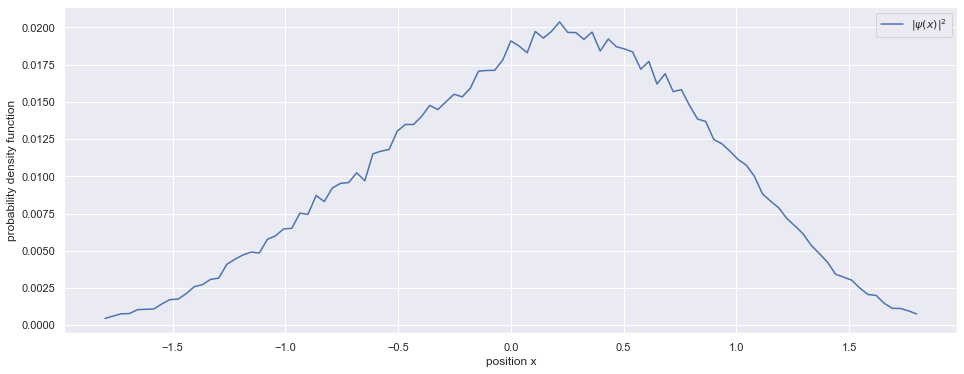

In [350]:
plt.figure(figsize=(16,6))

plt.plot(space_grid, distribution/np.sum(distribution), label='$|\\psi(x)|^2$')
plt.xlabel('position x')
plt.ylabel('probability density function')
plt.legend()
plt.show()

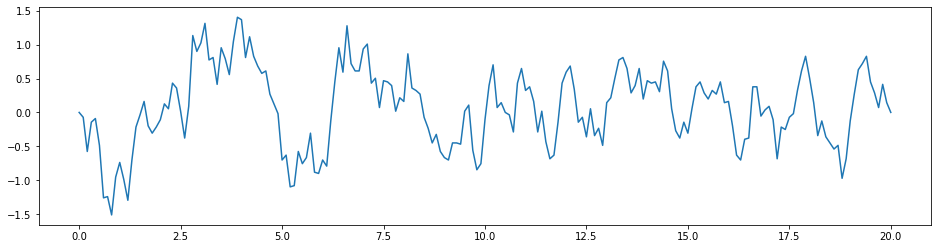

In [306]:
plt.figure(figsize=(16, 4))

plt.plot(time_grid, path)

In [310]:
N = 100 ; eps = 0.1
M = 101 ; delta = 1.8*2/(M-1)

time_grid = eps*np.arange(N+1)
space_grid = np.linspace(-1.8, 1.8, M)

def V(x): return x**2 / 2

def E(x, y, eps, V, m=1):
    T = 0.5*m*((x - y)/eps)**2

    U = V((x + y)/2)

    return T + U



path = np.zeros(N+1)              # camino inicial (cercano a la solucion)
distribution = np.zeros(M)


oldE = 0 ; newE = 0 ; change = 0 ; trials = 1000000

#for k in range(200):

path = np.ones(N+1)
path[-1] = path[0]

for i in range(trials):

    element = np.random.randint(1, N)
    U = np.random.uniform()

    x_element = path[element].copy()

    change = np.random.randint(0, M)

    path[element] = space_grid[change]
    newE = E(path[element-1], path[element], eps, V) + E(path[element], path[element+1], eps, V)

    if newE >  oldE and np.exp(-eps*(newE - oldE)) < U:     # rechazamos
        path[element] = x_element
    else: oldE = newE

    element = np.where(space_grid == path[element])[0]
    if element < M and element >= 0: distribution[element] += 1

    

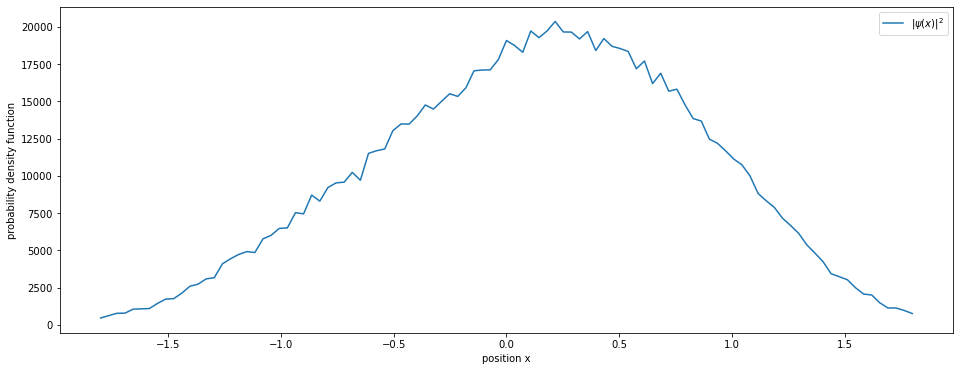

In [311]:
plt.figure(figsize=(16,6))

plt.plot(space_grid, distribution, label='$|\\psi(x)|^2$')
plt.xlabel('position x')
plt.ylabel('probability density function')
plt.legend()
plt.show()

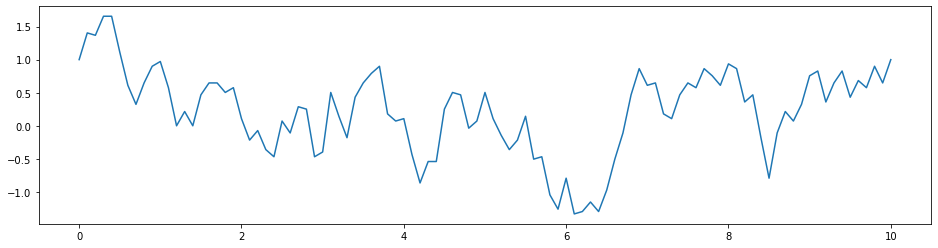

In [312]:
plt.figure(figsize=(16, 4))

plt.plot(time_grid, path)

In [391]:
N = 40 ; eps = 0.1
M = 41 ; delta = 1.8*2/(M-1)

time_grid = eps*np.arange(N+1)
x_space_grid = np.linspace(-1.8, 1.8, M)
y_space_grid = np.linspace(-1.8, 1.8, M)

def V(x, y): return (x**2 + y**2) / 2

def E(x1, x2, eps, V, m=1):
    T = 0.5*m*((x1[0] - x2[0])/eps)**2 + 0.5*m*((x1[1] - x2[1])/eps)**2

    U = V((x1[0] + x2[0])/2, (x1[0] + x2[0])/2)

    return T + U



path = np.zeros((N+1, 2))              # camino inicial (cercano a la solucion)
distribution = np.zeros((M, M))


oldE = 0 ; newE = 0 ; change = 0 ; trials = 3000000

#for k in range(200):

path = np.zeros((N+1, 2))
path[-1] = path[0]

for i in range(trials):

    t_element = np.random.randint(1, N)

    U = np.random.uniform()

    x_element = path[t_element][0].copy()
    y_element = path[t_element][1].copy()

    x_change = np.random.randint(0, M)
    y_change = np.random.randint(0, M)

    path[t_element] = x_space_grid[x_change], y_space_grid[y_change]
    
    newE = E(path[t_element-1], path[t_element], eps, V) + E(path[t_element], path[t_element+1], eps, V)

    if newE >  oldE and np.exp(-eps*(newE - oldE)) < U:     # rechazamos
        path[t_element] = x_element, y_element
    else: oldE = newE

    x_element = np.where(x_space_grid == path[t_element][0])[0]
    y_element = np.where(y_space_grid == path[t_element][1])[0]

    if max(x_element,y_element) < M and min(x_element, y_element) >= 0:
        
        distribution[x_element, y_element] += 1



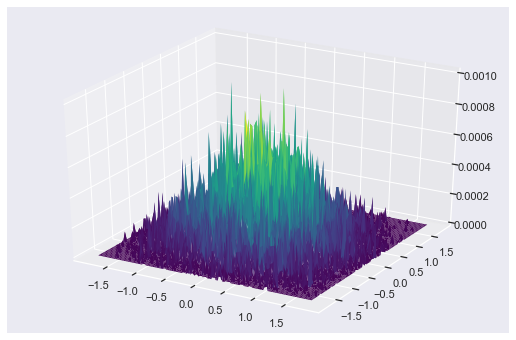

In [383]:
XX, YY = np.meshgrid(x_space_grid, y_space_grid)

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(XX, YY, distribution / np.sum(distribution), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
plt.show()


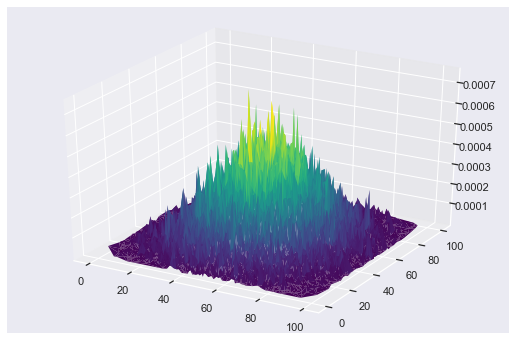

In [390]:
z = distribution / np.sum(distribution)
x, y = z.nonzero()

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z[z != 0], cmap='viridis', edgecolor='none')
plt.show()



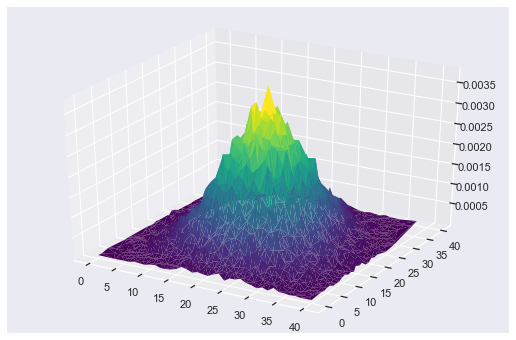

In [392]:
z = distribution / np.sum(distribution)
x, y = z.nonzero()

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z[z != 0], cmap='viridis', edgecolor='none')
plt.show()

# Del paper Lattice QCD for Novices

In [327]:
def update(x, eps, L):
    for j in range(0,N):
        old_x = x[j]
        old_Sj = S(j, x, eps)
        x[j] += np.random.uniform(-L, L)
        deltaS = S(j, x, eps) - old_Sj

        if deltaS > 0 and np.exp(-deltaS) < np.random.uniform():    # reject
            x[j] = old_x
        
def S(j, x, eps):
    jn = (j+1)%N            # next index
    jp = (j-1)%N            # previous index
    U = eps*x[j]**2 / 2
    T = x[j]*(x[j] - x[jn] - x[jp])/eps
    return T + U




Tomando $$G(t) \equiv \langle \langle x(t_2)x(t_1)\rangle\rangle \equiv \frac{\int \mathcal{D}x(t)x(t_2)x(t_1)e^{-S[x]}}{\int \mathcal{D}x(t)e^{-S[x]}} = \int \langle x|e^{-\tilde{H} (t_f - t_2)}\tilde{x} e^{-\tilde{H} (t_2 - t_1)} \tilde{x} e^{-\tilde{H} (t_1 - t_i)}|x\rangle dx$$ con $t = t_2 - t_1$, $T = t_f - t_i$.

$$ \langle \langle x(t_2)x(t_1)\rangle\rangle = \frac{\sum e^{-E_n T}\langle E_n | \tilde x e^{-(\tilde H - E_n)t}\tilde x | E_n\rangle}{\sum e^{-E_n T}}$$

Sabemos que si hacemos $T, t$ grandes pero con $t\ll T$, tenemos que

$$ G(t) \longrightarrow \langle E_0 | \tilde x e^{-(\tilde H - E_0)t}\tilde x | E_0\rangle \approx |\langle E_0 | \tilde x | E_1 \rangle|^2 e^{-(E_1 - E_0)t}.$$

Con lo cual tenemos $$ \log(G(t) / G(t+\varepsilon)) \longrightarrow (E_1 - E_0)\varepsilon $$

Consideraremos en nuestro caso $$G(t) = \frac{1}{N}\sum_j \langle\langle x(t_j + t) x_j\rangle\rangle  $$ para $t = 0, \varepsilon, 2\varepsilon, ...., (N-1)\varepsilon$. Es decir,

$$ G_n = \frac{1}{N}\sum_j \langle\langle x_{(t_j + n)\mod{N}}\ x_j\rangle\rangle $$ para $n=0,...,N-1$.

In [343]:
eps = 0.5 ; N = 20 ; L = 1.4 ; N_cor = 20

N_cf = [25, 100, 1000, 10000]

def compute_G(x, n):
    G = 0
    for j in range(N):
        G += x[(j+n)%N]*x[j]

    return G/N

G = np.zeros((N_cf[3], N))
avg_G = np.zeros(N)
std_G = np.zeros(N)

def MCaverage(x, G):
    for j in range(N):
        x[j] = 0

    for j in range(0, 5*N_cor):
        update(x, eps, L)

    for alpha in range(N_cf[3]):
        for j in range(N_cor):
            update(x, eps, L)
        for n in range(N):
            G[alpha, n] = compute_G(x, n)

    for n in range(N):
        avg_G[n] = G[:, n].mean()
        std_G[n] = G[:, n].std()



In [344]:
MCaverage(np.zeros(N), G)

In [345]:
dE = np.zeros(N-1)
std_dE = np.zeros(N-1)

for n in range(N-1):
    dE[n] = np.log(avg_G[n] / avg_G[n+1]) / eps
    std_dE[n] = np.log((avg_G[n] / avg_G[n+1])*np.sqrt((std_G[n]/avg_G[n])**2 + (std_G[n+1]/avg_G[n+1])**2))/eps

No handles with labels found to put in legend.


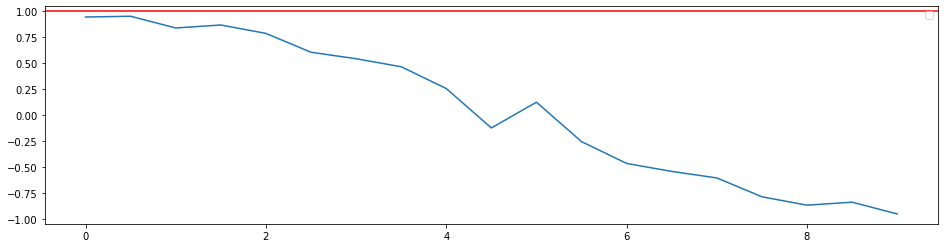

In [342]:
plt.figure(figsize=(16,4))
plt.errorbar(eps*np.arange(N-1), dE)#, yerr=std_dE[0:5]) RESULTADO CON 1000 EN TERMALIZACION
plt.axhline(1, color='r', linestyle='--')
plt.legend()
plt.show()

No handles with labels found to put in legend.


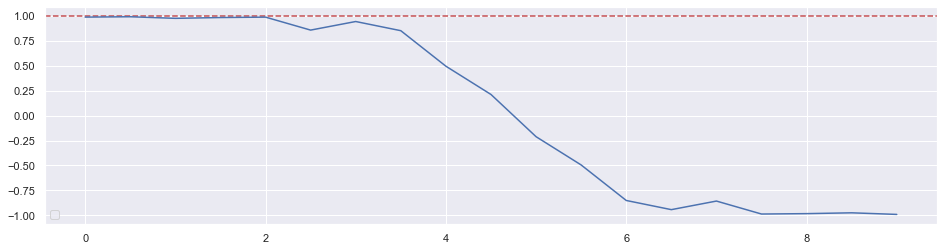

In [349]:
plt.figure(figsize=(16,4))
plt.errorbar(eps*np.arange(N-1), dE)#, yerr=std_dE[0:5])
plt.axhline(1, color='r', linestyle='--')
plt.legend()
plt.show()